In [ ]:
# Exploration of nutrition in Starbucks drinks. 
# Questions to explore for a non-technical audience:  
# 1) Which drinks have the lowest and highest calories?  
# 2) What is the sugar content of Starbucks drinks?
# 3) Which drink options offer a higher protein content?
# 4) Which drinks have a higher caffeine content when I need an afternoon boost?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [3]:
print(df)

              Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Ca

In [4]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0


In [5]:
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0


In [8]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [9]:
df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [10]:
#This proves that the data is very clean and only as 1 NULL value in Caffeine (mg)

In [11]:
import seaborn as sns

In [12]:
df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [13]:
df.calories = df[['Beverage_category','Calories']]
df.calories.columns = ['DrinkMenu', 'Calories']
df.calories

C:\Users\ak5du\AppData\Local\Temp\ipykernel_17624\3634503071.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.calories = df[['Beverage_category','Calories']]


,DrinkMenu,Calories
0,Coffee,3
1,Coffee,4
2,Coffee,5
3,Coffee,5
4,Classic Espresso Drinks,70
...,...,...
237,Frappuccino® Blended Crème,320
238,Frappuccino® Blended Crème,170
239,Frappuccino® Blended Crème,200
240,Frappuccino® Blended Crème,180


<Axes: xlabel='count', ylabel='DrinkMenu'>

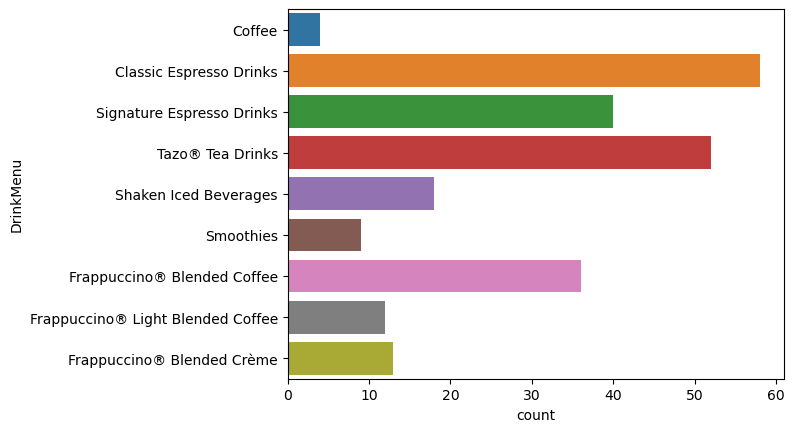

In [14]:
sns.countplot(y='DrinkMenu', data=df.calories)

In [ ]:
#Let's take a look at which Starbucks drinks has the highest calories

In [30]:
df.calories.sort_values("Calories", ascending=False)

,DrinkMenu,Calories
84,Signature Espresso Drinks,510
215,Frappuccino® Blended Coffee,460
85,Signature Espresso Drinks,460
83,Signature Espresso Drinks,450
128,Tazo® Tea Drinks,450
...,...,...
0,Coffee,3
105,Tazo® Tea Drinks,0
104,Tazo® Tea Drinks,0
103,Tazo® Tea Drinks,0


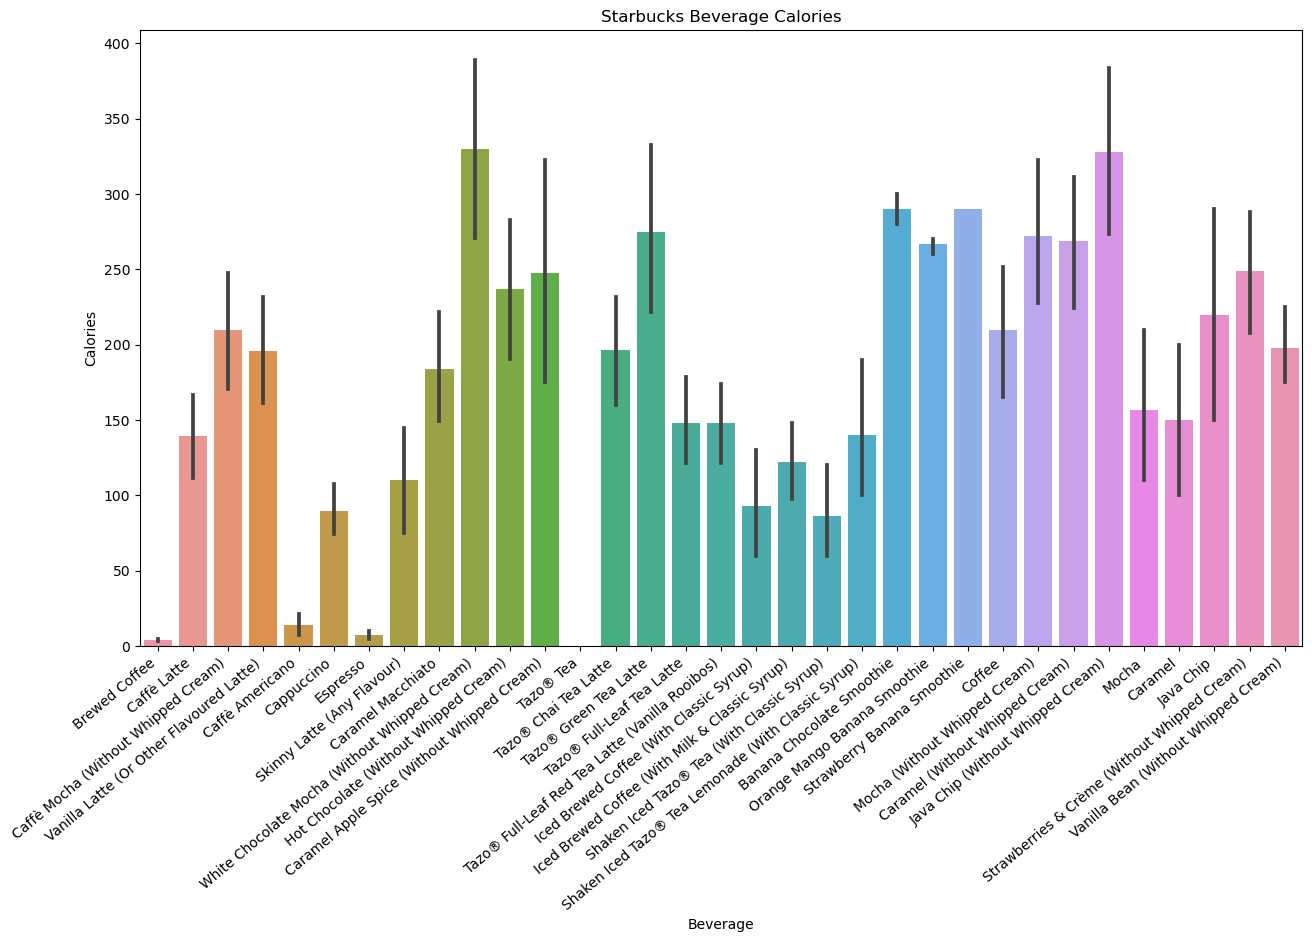

In [32]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y="Calories", data=df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Calories")
plt.show()

In [ ]:
#Which Drink has the highest sugar content at Starbucks?

In [34]:
df.sort_values(" Sugars (g)", ascending=False)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145.0
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145.0
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0.0
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145.0
206,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5,3.0,0.1,15,300,78,0,77,5.0,8%,0%,15%,2%,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Classic Espresso Drinks,Espresso,Solo,5,0,0.0,0.0,0,0,1,0,0,0.4,0%,0%,0%,0%,75.0
57,Classic Espresso Drinks,Espresso,Doppio,10,0,0.0,0.0,0,1,2,0,0,1.0,0%,0%,0%,0%,150.0
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,0.0
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,0.0


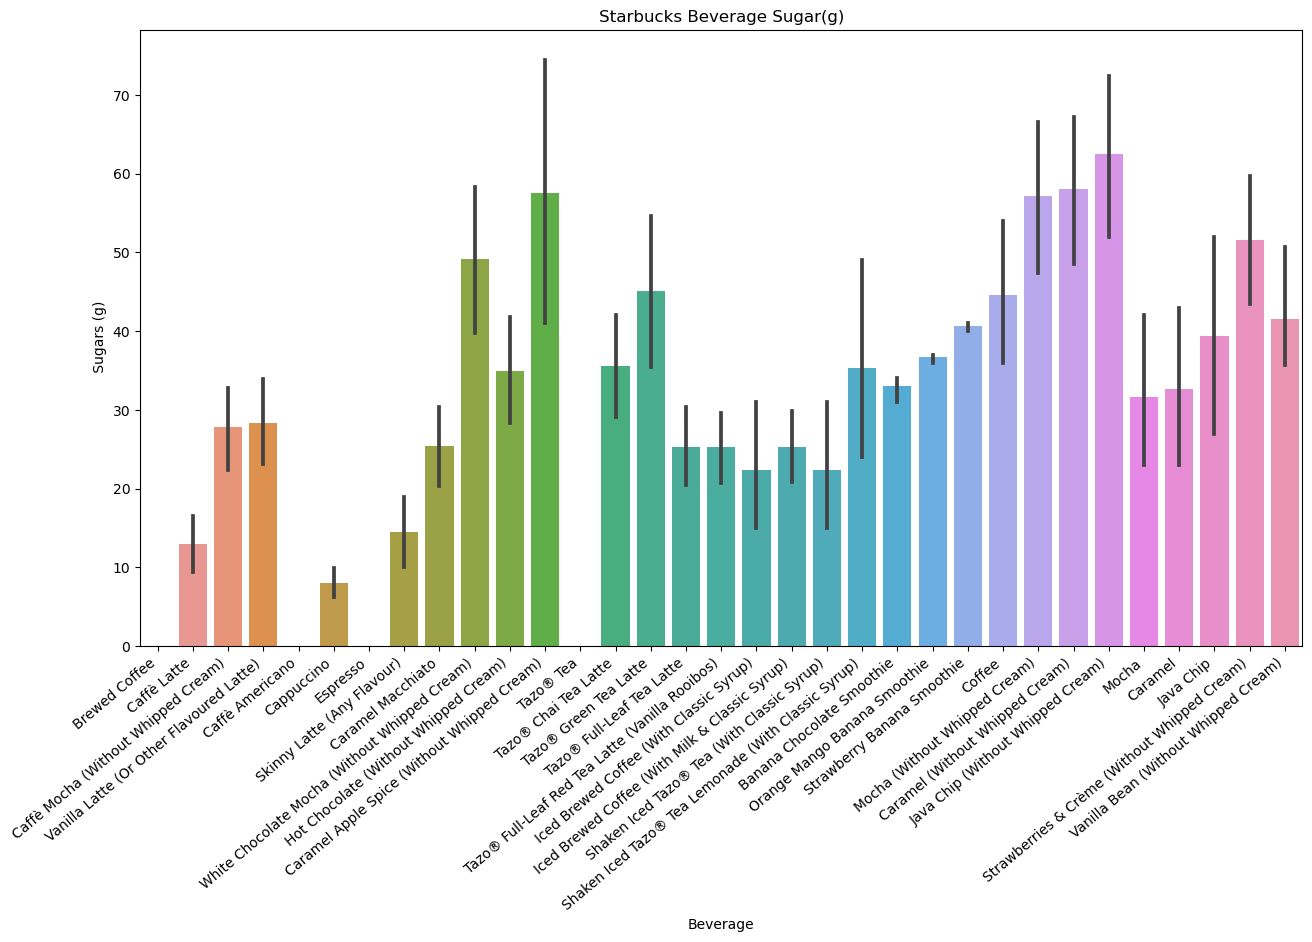

In [36]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y=" Sugars (g)", data=df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Sugar(g)")
plt.show()

In [38]:
df.groupby('Beverage_prep').count()

,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage_prep,,,,,,,,,,,,,,,,,
2% Milk,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,49
Doppio,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Grande,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Grande Nonfat Milk,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
Short,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Short Nonfat Milk,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Solo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Soymilk,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
Tall,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


Text(0, 0.5, 'Count')

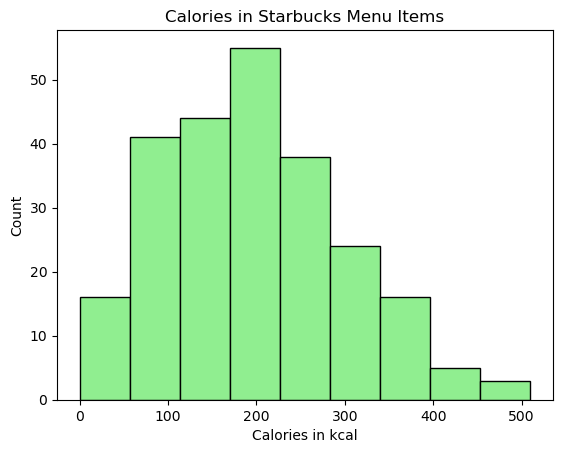

In [40]:
calories = df["Calories"]
plt.hist(calories, bins=9, edgecolor = "black", color = "lightgreen")
plt.title("Calories in Starbucks Menu Items")
plt.xlabel("Calories in kcal")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

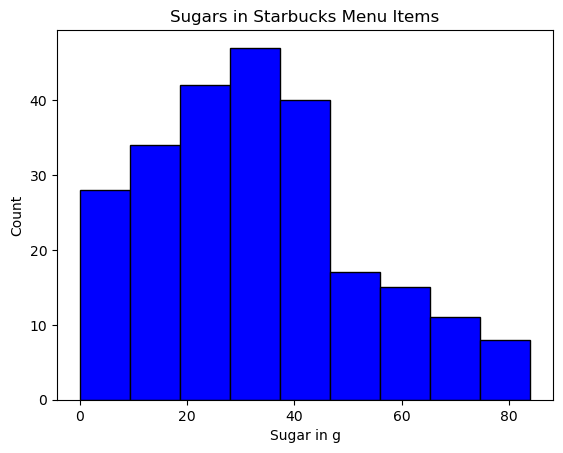

In [42]:
fat = df[" Sugars (g)"]
plt.hist(fat, bins=9, edgecolor = "black", color = "blue")
plt.title("Sugars in Starbucks Menu Items")
plt.xlabel("Sugar in g")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

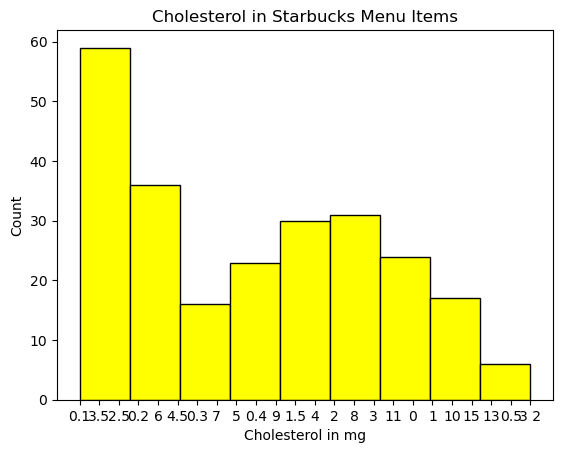

In [44]:
fat = df[" Total Fat (g)"]
plt.hist(fat, bins=9, edgecolor = "black", color = "yellow")
plt.title("Cholesterol in Starbucks Menu Items") # add a title
plt.xlabel("Cholesterol in mg")
plt.ylabel("Count")

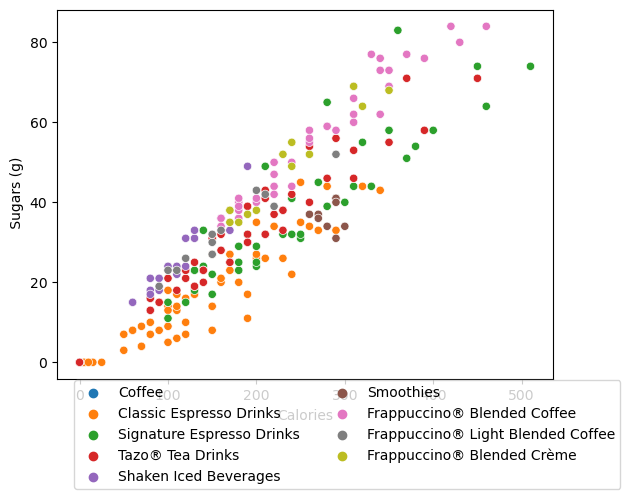

In [46]:
sns.scatterplot(data=df, x="Calories", y=" Sugars (g)", hue="Beverage_category")
plt.legend(loc="right", bbox_to_anchor=(1.15, -0.15), ncol= 2)

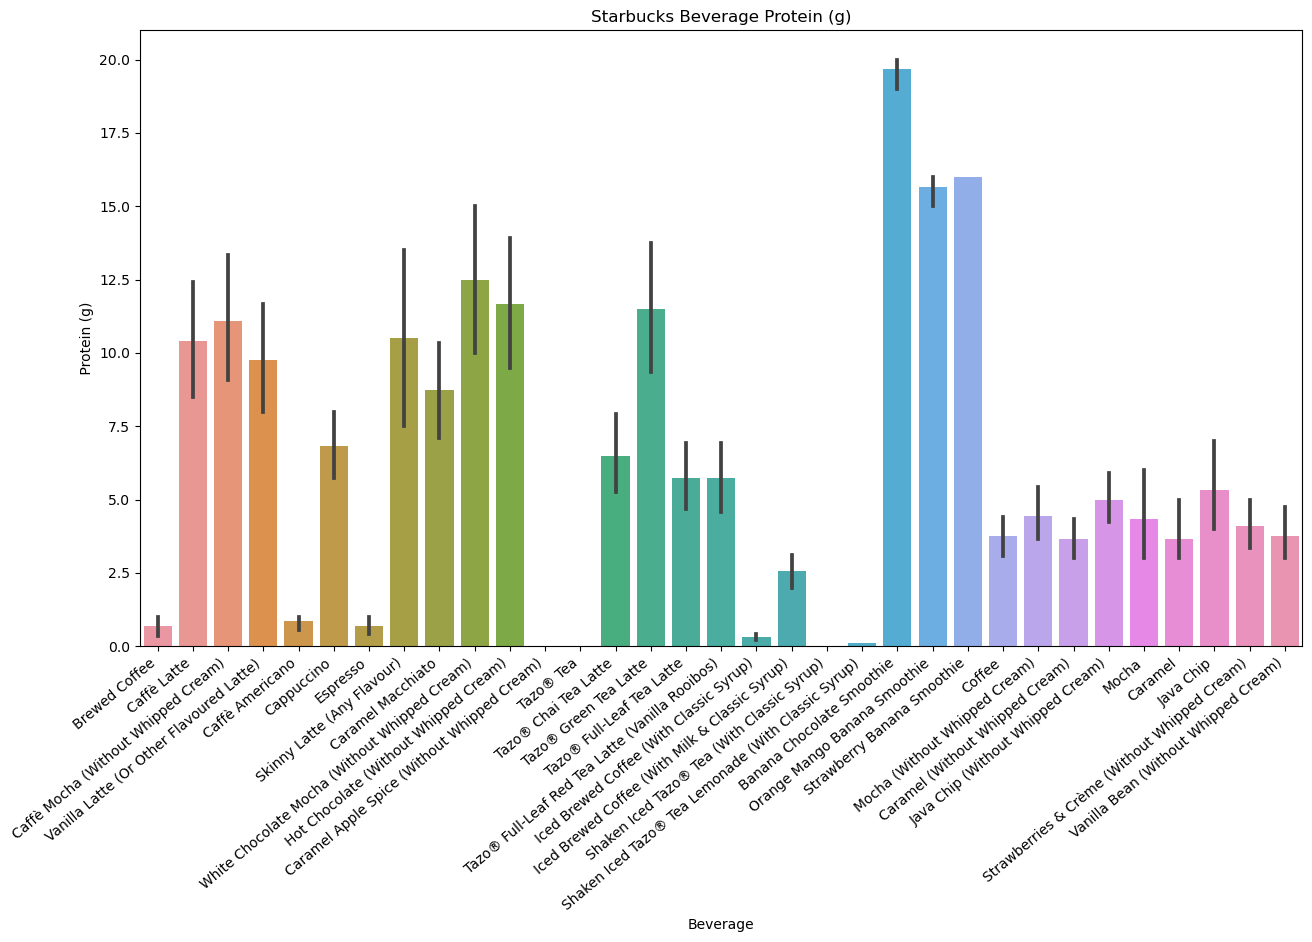

In [48]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y=" Protein (g) ", data=df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Protein (g)")
plt.show()

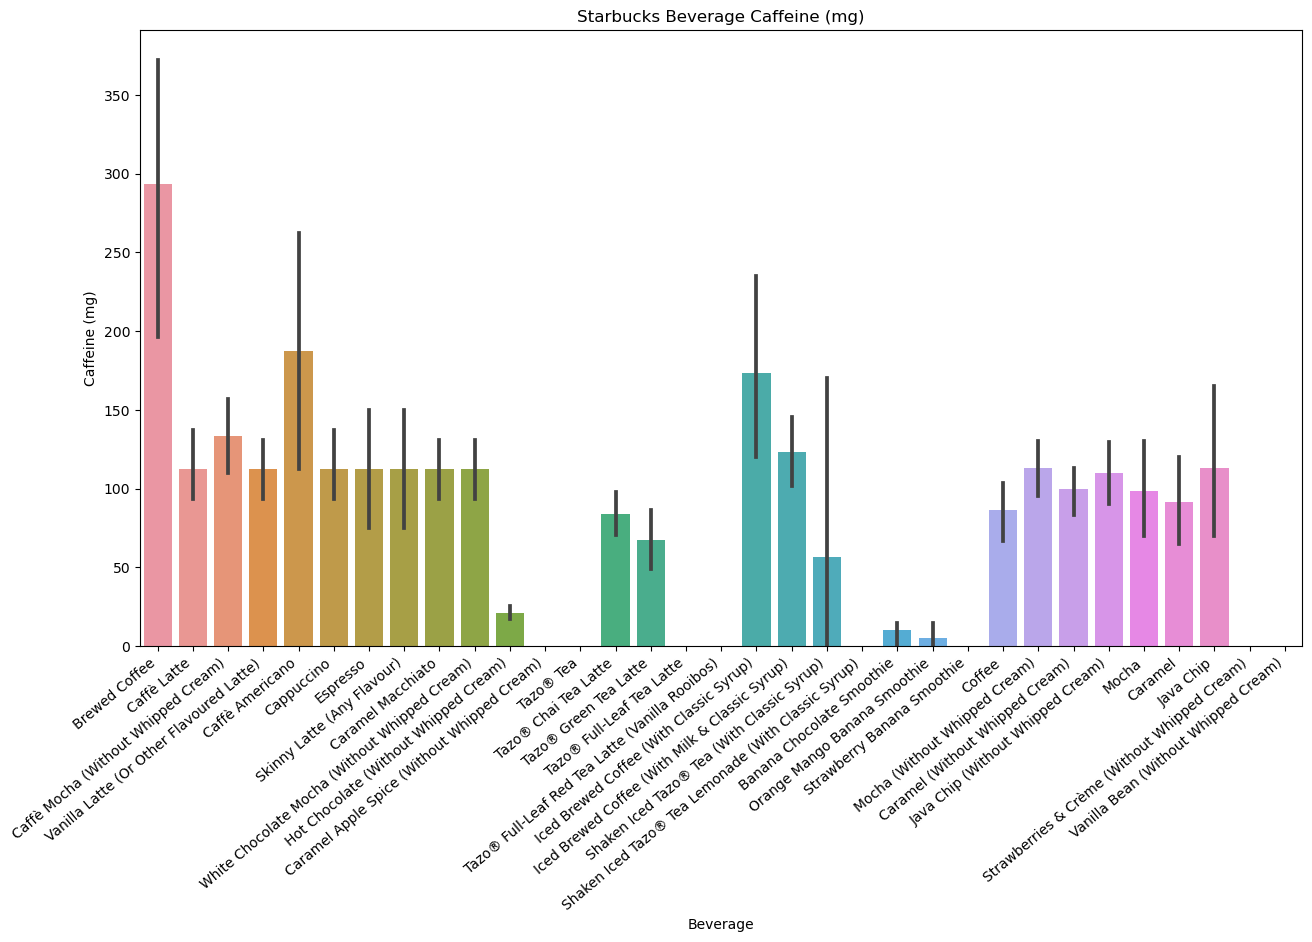

In [50]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y="Caffeine (mg)", data=df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Caffeine (mg)")
plt.show()

In [ ]:
# Conclusions
# Starbucks has drinks available ranging to high calorie, sweet, and healthy options.  Based on the questions that are explored during this 
# data analysis, we see that drinks have the lowest calories are Tazo Tea, Expresso, and Caffe Americano while drinks with the highest calories are 
# White Chocolate Mocha and Java Chip.  Sugar is another substantial nutritional fact that most people observe.  It can observed that Caramel Apple 
# Spice has the highest sugar intact followed by Java Chip.  Again, low sugar options included Tazo Tea, Expresso, and Caffe Americano. Protein is
# a very large component for customers who are looking for a fun and refreshing drink, but also need that extra protein nutrition if that means they 
# are coming from the gym or just to live a healthy lifestyle.  The smoothies lead in protein content with Banana Chocolate and Orange Mango Smoothies
# with the highest protein content.  A number of people need a higher boost of caffeine either in the morning or aftenoon.  Brewed Coffee and Caffe 
# Americano are two options to give you the most caffeine content.  